In [1]:
import numpy as np
from matplotlib import pyplot as plt

from model import Model

This model uses adaptive dynamics to allow for a pathogen to evolve to specialize on either juveniles or adults. The equations governing this model are given by

$\dot{J} = Ab - J(m + \gamma N +\mu + \frac{\beta_j I}{N})$

$\dot{A} = Jm - A(\gamma N + \mu + \frac{\beta_a I}{N})$

$\dot{I} = I(\frac{\beta_j J + \beta_a A}{N} - \mu)$

Where $b$ is the birthrate, $m$ is the maturation rate, $\gamma$ is the coefficient of density dependent growth, and $\mu$ is the death rate.

The transmission is controlled by two parameters, the juvenile infectivity rate, $\beta_j$ and the adult infectivity rate, $\beta_a$. We assume that there is a direct tradeoff between these infectivity rates. We assume further that the relationship between juvenile and adult infectivity is linear, where the maximum values each can take are equal.

Text(0, 0.5, 'Adult Infectivity Rate')

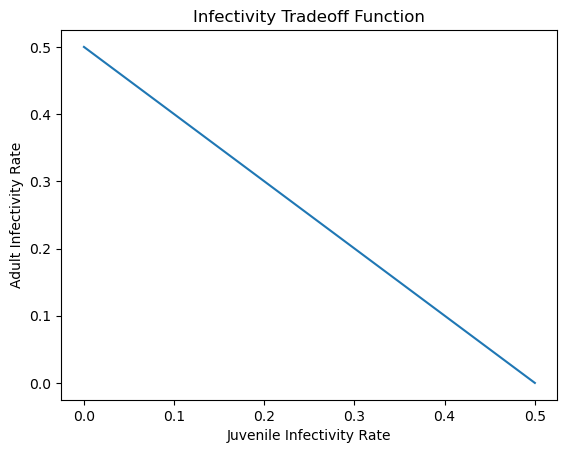

In [2]:
N_alleles = 100

beta_j = np.linspace(0, 0.5, N_alleles)
beta_a = np.linspace(0.5, 0, N_alleles)

plt.plot(beta_j, beta_a)
plt.title('Infectivity Tradeoff Function')
plt.xlabel('Juvenile Infectivity Rate')
plt.ylabel('Adult Infectivity Rate')

With this, we can run an adaptivy dynamics simulation, using the default parameters

$b = 1\\
\mu = 0.2\\
\gamma = 0.001\\
m = 0.4$

We get the following evolutionary outcome.


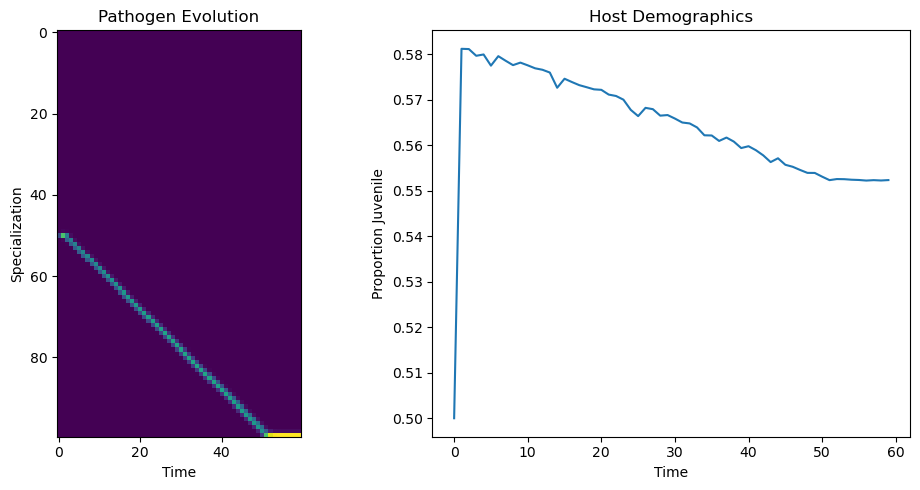

In [11]:
params = {  'b':1,				#Birthrate
			'mu':0.2,			#Deathrate
            'k':0.001,			#Coefficient of density dependent growth
            'mat':0.4}         #Maturation rate

sim = Model(**params)
J, A, I = sim.run_sim()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].imshow(I)
ax[0].set_ylabel('Specialization')
ax[0].set_xlabel('Time')
ax[0].set_title('Pathogen Evolution')

ax[1].plot(J/(J+A))
ax[1].set_ylabel('Proportion Juvenile')
ax[1].set_xlabel('Time')
ax[1].set_title('Host Demographics')

plt.tight_layout()

Here, with a relatively long maturation period, the pathogen evolves to completely specialize on juveniles. We can reverse this by shortening this period, setting $m = 0.6$.

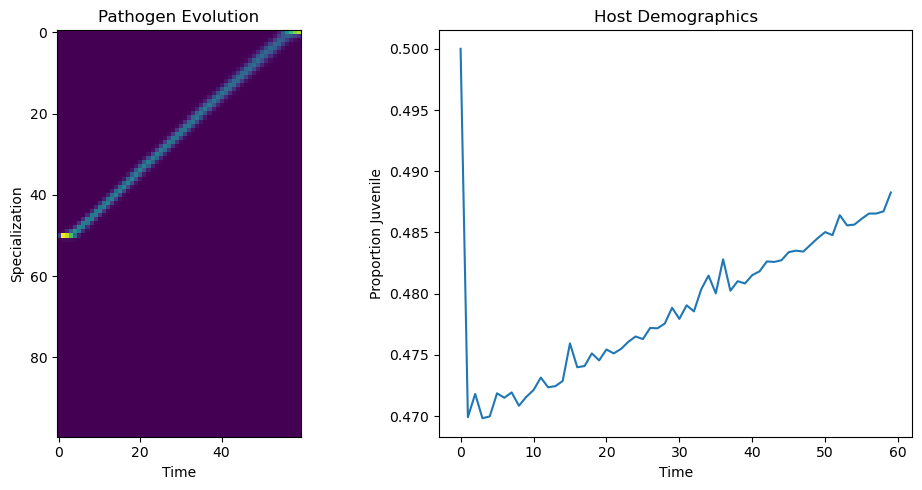

In [14]:
params = {  'b':1,				#Birthrate
			'mu':0.2,			#Deathrate
            'k':0.001,			#Coefficient of density dependent growth
            'mat':0.6}         #Maturation rate

sim = Model(**params)
J, A, I = sim.run_sim()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].imshow(I)
ax[0].set_ylabel('Specialization')
ax[0].set_xlabel('Time')
ax[0].set_title('Pathogen Evolution')

ax[1].plot(J/(J+A))
ax[1].set_ylabel('Proportion Juvenile')
ax[1].set_xlabel('Time')
ax[1].set_title('Host Demographics')

plt.tight_layout()

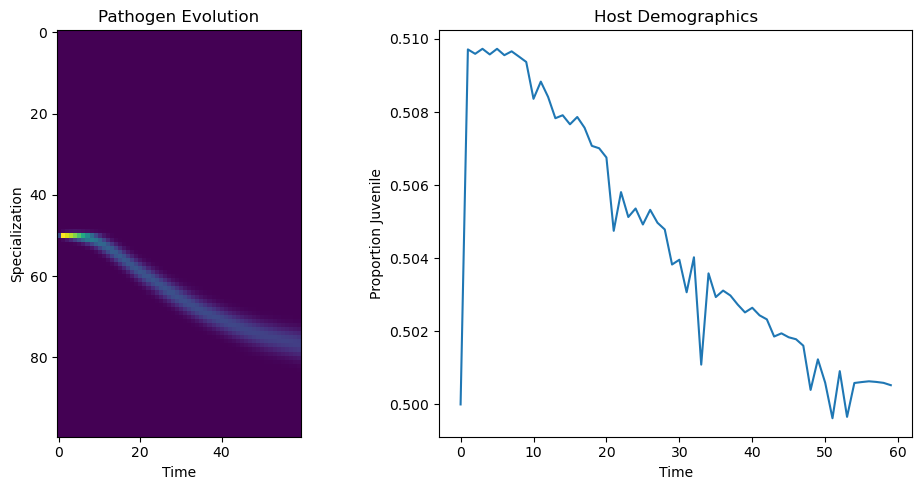

In [10]:
params = {  'b':1,				#Birthrate
			'mu':0.2,			#Deathrate
            'k':0.001,			#Coefficient of density dependent growth
            'mat':0.47}         #Maturation rate

sim = Model(**params)
J, A, I = sim.run_sim()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].imshow(I)
ax[0].set_ylabel('Specialization')
ax[0].set_xlabel('Time')
ax[0].set_title('Pathogen Evolution')

ax[1].plot(J/(J+A))
ax[1].set_ylabel('Proportion Juvenile')
ax[1].set_xlabel('Time')
ax[1].set_title('Host Demographics')

plt.tight_layout()

The mortality rate also plays an important role, as increasing the mortality rate redunces the overall proportion of adults in the population. To demonstate this, we run a simulation with the original parameters, but decrease the morality rate to $\mu = 0.05$

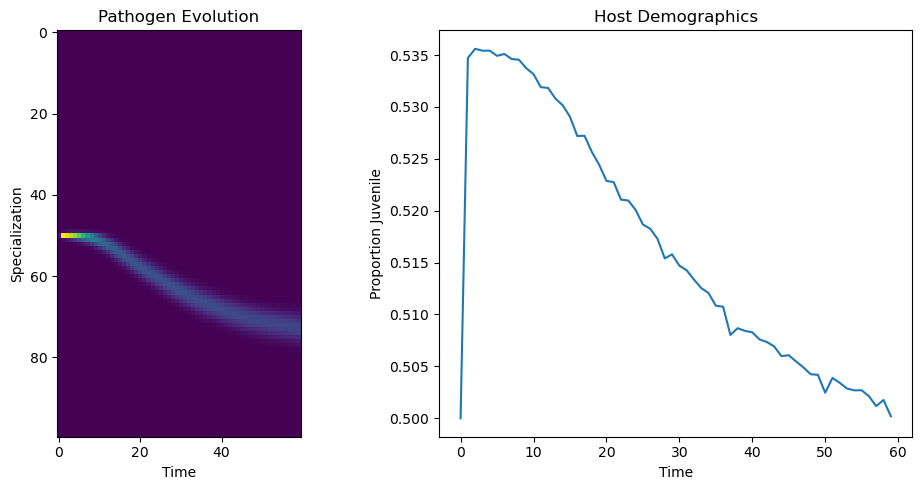

In [13]:
params = {  'b':1,				#Birthrate
			'mu':0.05,			#Deathrate
            'k':0.001,			#Coefficient of density dependent growth
            'mat':0.4}         #Maturation rate

sim = Model(**params)
J, A, I = sim.run_sim()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].imshow(I)
ax[0].set_ylabel('Specialization')
ax[0].set_xlabel('Time')
ax[0].set_title('Pathogen Evolution')

ax[1].plot(J/(J+A))
ax[1].set_ylabel('Proportion Juvenile')
ax[1].set_xlabel('Time')
ax[1].set_title('Host Demographics')

plt.tight_layout()

In all of these cases, the pathogen will evolve until the equilibrium host population consists of 50% juveniles and 50% adults. However, since the evolution of the pathogen is constrained with a maximum possible $\beta$ value of $0.5$, this is not quite realized in the above examples, but can be seen if we choose a maturation rate that produces a more even mix. We obtain a different optimum is we change the maximum $\beta$ values to not be even.

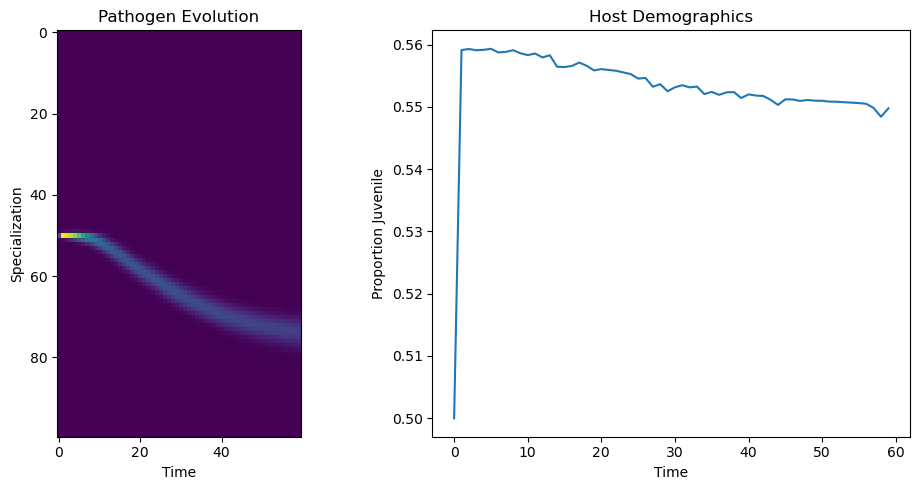

In [18]:
beta_j = np.linspace(0, 0.45, N_alleles)
beta_a = np.linspace(0.55, 0, N_alleles)

params = {  'b':1,
			'mu':0.2,
            'k':0.001,
            'mat':0.35,
            'beta_j':beta_j,
            'beta_a':beta_a}

sim = Model(**params)
J, A, I = sim.run_sim()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].imshow(I)
ax[0].set_ylabel('Specialization')
ax[0].set_xlabel('Time')
ax[0].set_title('Pathogen Evolution')

ax[1].plot(J/(J+A))
ax[1].set_ylabel('Proportion Juvenile')
ax[1].set_xlabel('Time')
ax[1].set_title('Host Demographics')

plt.tight_layout()

Here, we not have a maximum value of $\beta_j$ set to $0.45$ and a maximum value of $\beta_a$ set to $0.55$.

Where these parameters would previously lead to full juvenile specialization, we now see a mixed strategy, with a different equilibrium host demography.